In [89]:
# Import required libraries

import random
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from stock_price_forecast.data import get_inputs_with_time
from stock_price_forecast.preprocess import Preprocess

In [90]:

dataset = get_inputs_with_time("../data", "Coursera_15min.csv")
prep = Preprocess(p=32, t=2048, split = False, valid_ratio=0.20, scaling="min_max")

dataset = dataset.drop(columns = ["Open", "High", "Low"])
prep.fit(dataset)
x_train, y_train, x_train_indeces, y_train_indeces = prep.transform(dataset)

Number of time steps in one entry:  2048
Number of predictions in one entry:  32
Total length of one entry:  2080
Total number of samples:  7079
Training dataset shape:  (7079, 2048, 1)
Training labels shape:  (7079, 32)


In [91]:

trained_model = tf.keras.models.load_model('../saved_data/entire_model_Coursera')
pred = trained_model.predict(x_train)

222/222 [==============================] - 45s 199ms/step


In [92]:

x_train = x_train * (prep.x_max - prep.x_min) + prep.x_min

y_train = y_train * (prep.x_max - prep.x_min) + prep.x_min

pred = pred * (prep.x_max - prep.x_min) + prep.x_min

In [101]:
def plot_prediction(x_test, y_test, indeces_x, indeces_y, pred):
    indeces_y = pd.DatetimeIndex(indeces_y)
    n_g = 20
    n_x = y_test.shape[1] * 1
    random.seed(4)
    index_list = random.sample(range(0, x_test.shape[0]), n_g)
    fig, axes = plt.subplots(n_g, 1, figsize=(18, 4 * n_g))
    fig.subplots_adjust(hspace=0.7)

    for g, i in zip(range(n_g), index_list):
        #axes[g].plot(np.hstack((indeces_x[i, -n_x:], indeces_y[i, :])), np.hstack((x_test[i, -n_x:, 0], y_test[i, :])), color = '#7A77B9')
        axes[g].plot(y_test[i, :], color = '#7A77B9')
        axes[g].plot(pred[i, :], color = '#F2C76E')
        axes[g].set_title(str(indeces_y[i][0].day) + ' ' + str(indeces_y[i][0].month_name()) + ' - ' + str(indeces_y[i][-1].day) + 
                            ' ' + str(indeces_y[i][-1].month_name()) + ' ' + str(indeces_y[i][-1].year))
        axes[g].legend(["Actual", "Predicted"])
        axes[g].grid(linewidth = 0.1, color = "#000000")
        axes[g].set_xticks(range(len(indeces_y[i, :])), indeces_y[i, :].strftime("%H:%M:%S"), rotation = 45)
        #axes[g].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        axes[g].set_xlabel("Time")
        axes[g].set_ylabel("Stock price in US dollars")
    plt.show()

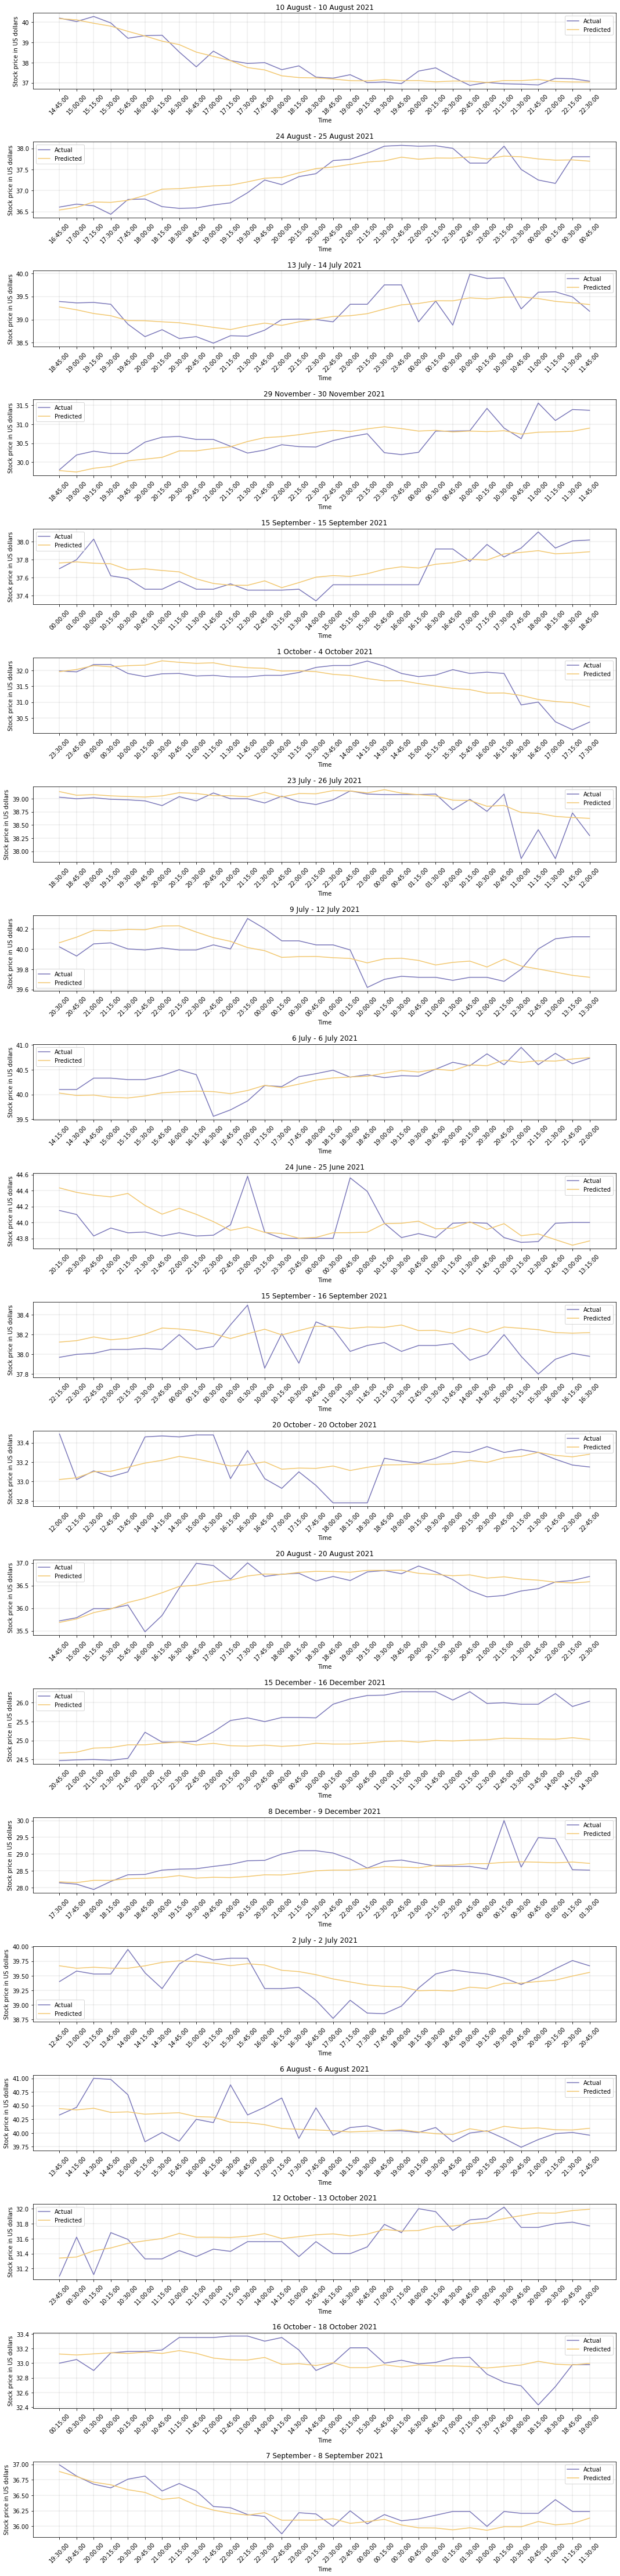

In [102]:
plot_prediction(x_train, y_train, x_train_indeces, y_train_indeces, pred)